<a href="https://colab.research.google.com/github/xwasanx/HomeEx/blob/main/Forecast_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT created_at, count(*) as nb_exchanges FROM `homeex-420408.home_exchange.exchanges_cleaned` GROUP BY created_at"
project = "homeex-420408"

df = pd.read_gbq(query=query, project_id=project)

In [ ]:
!pip install AutoTS

In [ ]:
df["created_at"]=pd.to_datetime(df["created_at"])

In [ ]:
df=df.set_index("created_at")
df

,nb_exchanges
created_at,
2022-07-12,12823
2022-09-29,11026
2022-03-24,15296
2022-05-08,20371
2019-08-26,5018
...,...
2019-01-03,168
2020-03-30,522
2020-04-07,611


In [ ]:
df=df.resample('M').sum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2019-01-31 to 2022-11-30
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nb_exchanges  47 non-null     Int64
dtypes: Int64(1)
memory usage: 799.0 bytes


In [ ]:
from autots import AutoTS
m  = AutoTS(
    forecast_length=6,
    frequency='M', # Specify if days D months M year Y
    prediction_interval=0.95,
    ensemble=None,
    models_mode='deep',
    model_list = 'univariate', # 'univariate',# or ['ARIMA','ETS']
    max_generations=10,
    num_validations=3,
    no_negatives=False,
    n_jobs='auto')

Using 1 cpus for n_jobs.


In [ ]:
from autots import AutoTS
model_a = AutoTS(forecast_length=6,
    frequency='M',# Specify if days D months M year Y
    prediction_interval=0.95,
    ensemble=None,
    models_mode='deep',
    model_list = ['ARIMA','ETS'], # 'univariate',# or ['ARIMA','ETS']
    max_generations=10,
    num_validations=3,
    no_negatives=False,
    n_jobs='auto')

Using 1 cpus for n_jobs.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2019-01-31 to 2022-11-30
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nb_exchanges  47 non-null     Int64
dtypes: Int64(1)
memory usage: 799.0 bytes


In [ ]:
model_a.fit(df['nb_exchanges'])

Data frequency is: M, used frequency is: M
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ETS in generation 0 of 10
Model Number: 3 with model ETS in generation 0 of 10
Model Number: 4 with model ETS in generation 0 of 10
Model Number: 5 with model ARIMA in generation 0 of 10
Model Number: 6 with model ETS in generation 0 of 10
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params ffill_mean_biased {'0': {'lag_1': 12, 'method': 'Median'}, '1': {'low': 8, 'high': 364, 'K': 1, 'lanczos_factor': True, 'return_diff': False}, '2': {}, '3': {}, '4': {'window': None}}") in model 6 in generation 0: ETS
Model Number: 7 with model ETS in generation 0 of 10
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model':

/usr/local/lib/python3.10/dist-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '2': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 1000, 'min_samples_leaf': 2, 'bootstrap': True}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': False}, '3': {'det_order': 0, 'k_ar_diff': 2}}") in model 64 in generation 5: ARIMA
New Generation: 6 of 10
Model Number: 65 with model ETS in generation 6 of 10
Model Number: 66 with model ETS in generation 6 of 10
Model Number: 67 with model ARIMA in generation 6 of 10
Model Number: 68 with model ARIMA in generation 6 of 10
Model Number: 69 with model ETS in generation 6 of 10
Model Number: 70 with model ETS in generation 6 of 10
Model Number: 71 with model ETS in generation 6 of 10
Template

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


New Generation: 8 of 10
Model Number: 85 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 85 in generation 8: ARIMA
Model Number: 86 with model ARIMA in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'lag_1': 28, 'method': 'LastValue'}, '2': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '3': {'lag_1': 12, 'method': 'LastValue'}}") in model 86 in generation 8: ARIMA
Model Number: 87 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 87 in generation 8: ARIMA
Model Number: 88 with model ARIMA in generation 8 of 10
Model Number: 89 with model ARIMA in generation 8 of 10
Model Number: 90 with model ARIMA in generation 8 of 10
Model Number: 91 with model ETS in generation 8 of 10


Initiated AutoTS object with best model: 
ETS
{'fillna': 'time', 'transformations': {'0': 'cffilter', '1': 'AlignLastValue', '2': 'bkfilter', '3': 'ClipOutliers', '4': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '4': {}}}
{'damped_trend': False, 'trend': None, 'seasonal': None, 'seasonal_periods': None}
Validation: 0, 1, 2, 3
SMAPE: 13.269443448209941, 49.211667700126334, 22.72754496133824, 42.721961407716144
MAE: 47288.0921296463, 188498.01206454894, 63746.39171510793, 92819.73767978027
SPL: 0.32717578365969524, 1.1638580566848917, 0.22290243971964618, 0.395342286488774

In [ ]:
model_u.fit(df['nb_exchanges'])

Data frequency is: M, used frequency is: M
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
2/2 [==============================] - 7s 18ms/step - loss: 0.3503
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 0.3412
Epoch 3/50
2/2 [==============================] - 0s 20ms/step - loss: 0.3404
Epoch 4/50
2/2 [==============================] - 0s 16ms/step - loss: 0.3421
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3353
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3422
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3415
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.3365
Epoch 9/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3386
Epoch 10/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3330
Epoch 11/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3345
Epoch 12/50
2/2 [==============================] - 0s 15ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 54 with model GLM in generation 0 of 10
Model Number: 55 with model UnivariateMotif in generation 0 of 10
Template Eval Error: IndexError('index 19 is out of bounds for axis 0 with size 1') in model 55 in generation 0: UnivariateMotif
Model Number: 56 with model SeasonalityMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 57 with model PreprocessingRegression in generation 0 of 10
Model Number: 58 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 58 in generation 0: ARDL
Model Number: 59 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 59 in generation 0: ARIMA
Model Number: 60 with model FBProphet in generation 0 of 10
Model Number: 61 with model FFT in generation 0 of 10
Model Number: 62 with model SeasonalNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model NeuralProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 65 in generation 0: NeuralProphet
Model Number: 66 with model MetricMotif in generation 0 of 10
Model Number: 67 with

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'span': 12}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '4': {'method': 0.2}, '5': {}}") in model 96 in generation 0: FBProphet
Model Number: 97 with model ARIMA in generation 0 of 10
Model Number: 98 with model GLS in generation 0 of 10
Model Number: 99 with model UnivariateMotif in generation 0 of 10
Template Eval Error: IndexError('index 23 is out of bounds for axis 0 with size 1') in model 99 in generation 0: UnivariateMotif
Model Number: 100 with model FFT in generation 0 of 10
Model Number: 101 with model GLM in generation 0 of 10
Model Number: 102 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError(

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 106 with model GLS in generation 0 of 10
Model Number: 107 with model PreprocessingRegression in generation 0 of 10
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 36 and the array at index 1 has size 41') in model 107 in generation 0: PreprocessingRegression
Model Number: 108 with model FFT in generation 0 of 10
Model Number: 109 with model Theta in generation 0 of 10
Model Number: 110 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 110 in generation 0: ARCH
Model Number: 111 with model UnivariateRegression in generation 0 of 10
Model Number: 112 with model GLS in generation 0 of 10
Model Number: 113 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'n_harmonics': 10, 'detrend': 'qua

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 122 with model Theta in generation 0 of 10
Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model UnivariateRegression in generation 0 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'discretization': 'upper', 'n_bins': 5}, '3': {}, '4': {}}") in model 124 in generation 0: UnivariateRegression
Model Number: 125 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1}, '3': {'rows': 2, 'lag': 28, 'method': 'additive', 'strength': 1.0, 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Epoch 1/50
25/25 [==============================] - 7s 8ms/step - loss: 0.0157
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 9/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 10/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 11/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 12/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 13/50
25/25 [==============================

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: LinAlgError('SVD did not converge') in model 156 in generation 0: KalmanStateSpace
Model Number: 157 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 157 in generation 0: DatepartRegression
New Generation: 1 of 10
Model Number: 158 with model UnivariateMotif in generation 1 of 10
Model Number: 159 with model GLM in generation 1 of 10
Model Number: 160 with model GLS in generation 1 of 10
Model Number: 161 with model ConstantNaive in generation 1 of 10
Model Number: 162 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 163 with model AverageValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 164 with model PreprocessingRegression in generation 1 of 10
Model Number: 165 with model Theta in generation 1 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'model': 'Linear'}, '3': {'output_distribution': 'uniform', 'n_quantiles': 13}, '4': {'discretization': 'sklearn-kmeans', 'n_bins': 10}, '5': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 0.05}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 167 with model GLS in generation 1 of 10
Model Number: 168 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 168 in generation 1: GLM
Model Number: 169 with model LastValueNaive in generation 1 of 10
Model Number: 170 with model SeasonalityMotif in generation 1 of 10
Model Number: 171 with model UnivariateMotif in generation 1 of 10
Model Number: 172 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/num

Model Number: 173 with model GLM in generation 1 of 10
Model Number: 174 with model LastValueNaive in generation 1 of 10
Model Number: 175 with model Theta in generation 1 of 10
Model Number: 176 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("ARDL series nb_exchanges failed with error ValueError('The number of regressors (10) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (5).') exog train             HolidayFlag_US\ncreated_at                \n2021-06-30             0.0\n2021-07-31             0.0\n2021-08-31             0.0\n2021-09-30             0.0\n2021-10-31             0.0\n2021-11-30             0.0\n2021-12-31             1.0\n2022-01-31             0.0\n2022-02-28             0.0\n2022-03-31             0.0\n2022-04-30             0.0\n2022-05-31             0.0 and predict             HolidayFlag_US\n2022-06-30             0.0\n2022-07-31             0.0\n202

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 187 with model GLS in generation 1 of 10
Model Number: 188 with model LastValueNaive in generation 1 of 10
Model Number: 189 with model PreprocessingRegression in generation 1 of 10
Epoch 1/50
21/21 [==============================] - 7s 7ms/step - loss: 86529.6719
Epoch 2/50
21/21 [==============================] - 0s 8ms/step - loss: 86529.6641
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 86529.6641
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 86529.6719
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 86529.6719
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 86529.6484
Epoch 7/50
21/21 [==============================] - 0s 8ms/step - loss: 86529.6328
Epoch 8/50
21/21 [==============================] - 0s 8ms/step - loss: 86529.6328
Epoch 9/50
21/21 [==============================] - 0s 8ms/step - loss: 86529.6484
Epoch 10/50
21/21 [==============================] - 0s 8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.616e+11, tolerance: 6.609e+07
  model = cd_fast.enet_coordinate_descent(


Model Number: 197 with model Theta in generation 1 of 10
Model Number: 198 with model PreprocessingRegression in generation 1 of 10
Model Number: 199 with model LastValueNaive in generation 1 of 10
Model Number: 200 with model UnobservedComponents in generation 1 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params fake_date {'0': {}, '1': {'fillna': 'SeasonalityMotifImputer1K', 'center': 'median'}}") in model 200 in generation 1: UnobservedComponents
Model Number: 201 with model UnivariateRegression in generation 1 of 10
Model Number: 202 with model UnivariateMotif in generation 1 of 10
Model Number: 203 with model Theta in generation 1 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'sigma': 1, 'rol

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 252 with model ARDL in generation 1 of 10
Model Number: 253 with model GLM in generation 1 of 10
Model Number: 254 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 254 in generation 1: DatepartRegression
Model Number: 255 with model DatepartRegression in generation 1 of 10
Model Number: 256 with model GLM in generation 1 of 10
Model Number: 257 with model UnobservedComponents in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 258 with model FFT in generation 1 of 10
Model Number: 259 with model SeasonalNaive in generation 1 of 10
Model Number: 260 with model Theta in generation 1 of 10
Model Number: 261 with model Theta in generation 1 of 10
Template Eval Error: ValueError('x must have 2 complete cycles requires 56 observations. x only has 41 observation(s)') in model 261 in generation 1: Theta
Model Number: 262 with model UnobservedComponents in generation 1 of 10
Model Number: 263 with model ConstantNaive in generation 1 of 10
Model Number: 264 with model DatepartRegression in generation 1 of 10
Model Number: 265 with model GLS in generation 1 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill_mean_biased {'0': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False}, '1':

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 284 with model GLM in generation 2 of 10
Model Number: 285 with model ETS in generation 2 of 10
Model Number: 286 with model ARDL in generation 2 of 10
Model Number: 287 with model ARDL in generation 2 of 10
Model Number: 288 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 288 in generation 2: UnivariateRegression
Model Number: 289 with model SeasonalityMotif in generation 2 of 10
Model Number: 290 with model LastValueNaive in generation 2 of 10
Model Number: 291 with model AverageValueNaive in generation 2 of 10
Model Number: 292 with model FFT in generation 2 of 10
Model Number: 293 with model AverageValueNaive in generation 2 of 10
Model Number: 294 with model Theta in generation 2 of 10
Model Number: 295 with model LastValueNaive in generation 2 of 10
Model Number: 296 with model PreprocessingRegression in generation 2 of 10
Model Number: 297 with model Seasonal

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "


Model Number: 309 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 309 in generation 2: DatepartRegression
Model Number: 310 with model LastValueNaive in generation 2 of 10
Model Number: 311 with model AverageValueNaive in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM

Model Number: 312 with model SeasonalityMotif in generation 2 of 10
Model Number: 313 with model GLS in generation 2 of 10
Model Number: 314 with model UnivariateRegression in generation 2 of 10
Model Number: 315 with model DatepartRegression in generation 2 of 10
Model Number: 316 with model ConstantNaive in generation 2 of 10
Model Number: 317 with model DatepartRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:599: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM

Model Number: 318 with model FBProphet in generation 2 of 10
Model Number: 319 with model ETS in generation 2 of 10
Model Number: 320 with model UnobservedComponents in generation 2 of 10
Model Number: 321 with model ETS in generation 2 of 10
Model Number: 322 with model MetricMotif in generation 2 of 10
Model Number: 323 with model PreprocessingRegression in generation 2 of 10
Epoch 1/50
25/25 [==============================] - 7s 9ms/step - loss: 260958.6250
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 260955.6094
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 260953.2969
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 260951.9844
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 260951.0938
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 260950.2969
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 260949.6250
Epoch 8/50
25/25 [=============

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 328 with model LastValueNaive in generation 2 of 10
Model Number: 329 with model UnobservedComponents in generation 2 of 10
Model Number: 330 with model UnivariateRegression in generation 2 of 10
Model Number: 331 with model UnivariateRegression in generation 2 of 10
Model Number: 332 with model Theta in generation 2 of 10
Model Number: 333 with model LastValueNaive in generation 2 of 10
Model Number: 334 with model PreprocessingRegression in generation 2 of 10
Model Number: 335 with model Theta in generation 2 of 10
Model Number: 336 with model GLM in generation 2 of 10
Model Number: 337 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 337 in generation 2: UnivariateRegression
Model Number: 338 with model LastValueNaive in generation 2 of 10
Model Number: 339 with model Theta in generation 2 of 10
Model Number: 340 with model UnivariateMotif in generation 2 of 10
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:620: RuntimeWarning: divide by zero encountered in divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


Model Number: 358 with model GLS in generation 2 of 10
Model Number: 359 with model ARDL in generation 2 of 10
Model Number: 360 with model ARDL in generation 2 of 10
Model Number: 361 with model Theta in generation 2 of 10
Model Number: 362 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 362 in generation 2: DatepartRegression
Model Number: 363 with model UnivariateMotif in generation 2 of 10
Model Number: 364 with model ARDL in generation 2 of 10
Model Number: 365 with model FFT in generation 2 of 10
Model Number: 366 with model SeasonalNaive in generation 2 of 10
Model Number: 367 with model SeasonalityMotif in generation 2 of 10
Model Number: 368 with model ETS in generation 2 of 10
Model Number: 369 with model SeasonalNaive in generation 2 of 10
Model Number: 370 with model ARDL in generation 2 of 10
Model Number: 371 with model SeasonalityMotif in generation 2 of 10
Model Number:

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 377 with model FFT in generation 2 of 10
Model Number: 378 with model UnivariateRegression in generation 2 of 10
Model Number: 379 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298357088.32055664, tolerance: 233611485.72259825
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 380 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 380 in generation 2: GLM
Model Number: 381 with model ETS in generation 2 of 10
Model Number: 382 with model AverageValueNaive in generation 2 of 10
Model Number: 383 with model ARDL in generation 2 of 10
Model Number: 384 with model UnobservedComponents in generation 2 of 10
Model Number: 385 with model ETS in generation 2 of 10
Model Number: 386 with model UnivariateMotif in generation 2 of 10
Model Number: 387 with model AverageValueNaive in generation 2 of 10
New Generation: 3 of 10
Model Number: 388 with model UnivariateMotif in generation 3 of 10
Model Number: 389 with model SeasonalityMotif in generation 3 of 10
Model Number: 390 with model UnivariateRegression in generation 3 of 10
Model Number: 391 with model PreprocessingRegression in generation 3 of 10
Epoch 1/50
3/3 [==============================] - 11s 2s/step - loss: 11737

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 401 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'last_value'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}, '3': {'lag_1': 4, 'method': 'LastValue'}}") in model 401 in generation 3: SeasonalNaive
Model Number: 402 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (26)') in model 402 in generation 3: UnivariateMotif
Model Number: 403 with model ARIMA in generation 3 of 10
Model Number: 404 with model AverageValueNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 405 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("ARDL series nb_exchanges failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\ncreated_at                \n2019-01-31             0.0\n2019-02-28             0.0\n2019-03-31             0.0\n2019-04-30             0.0\n2019-05-31             0.0\n2019-06-30             0.0\n2019-07-31             0.0\n2019-08-31             0.0\n2019-09-30             0.0\n2019-10-31             0.0\n2019-11-30             0.0\n2019-12-31             0.0\n2020-01-31             0.0\n2020-02-29             0.0\n2020-03-31             0.0\n2020-04-30             0.0\n2020-05-31             0.0\n2020-06-30             0.0\n2020-07-31             0.0\n2020-08-31             0.0\n2020-09-30             0.0\n2020-10-31             0.0\n2020-11-30             0.0\n2020-12-31             0.0\n2021-01-31             0.0\n2021-02-28             0.0\n2021

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 427 with model Theta in generation 3 of 10
Model Number: 428 with model Theta in generation 3 of 10
Model Number: 429 with model AverageValueNaive in generation 3 of 10
Model Number: 430 with model GLS in generation 3 of 10
Model Number: 431 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 431 in generation 3: SeasonalityMotif
Model Number: 432 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'lag_1': 2, 'method': 5}, '1': {'fixed': True, 'window': 10}, '2': {'det_order': -1, 'k_ar_diff': 0}, '3': {'fixed': True, 'window': 1440, 'macro_micro': False, 'center': False}}") in model 432 in generation 3: DatepartRegression
Model Number: 433 with model UnobservedComponents in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 434 with model ETS in generation 3 of 10
Model Number: 435 with model UnobservedComponents in generation 3 of 10
Model Number: 436 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill_mean_biased {'0': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, 'remove_excess_anomalies': True,

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 446 with model Theta in generation 3 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params quadratic {'0': {'model_name': 'MA', 'state_transition': [[1, 0], [1, 0]], 'process_noise': [[0.2, 0.0], [0.0, 0]], 'observation_model': [[1, 0.1]], 'observation_noise': 1.0, 'em_iter': 10}, '1': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {}, '3': {'span': 4}, '4': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '5': {'lag_1': 2, 'method': 20}}") in model 446 in generation 3: Theta
Model Number: 447 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("ARDL series nb_exchanges failed with error ValueError('in

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 453 with model ETS in generation 3 of 10
Model Number: 454 with model Theta in generation 3 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'fixed': True, 'window': 10}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': ['weekdaymonthofyear', 'quarter', 'dayofweek'], 'polynomial_degree': None, 'transform_dict': {'fillna': 'fake_date', 'transformations': {'0': 'RegressionFilter', '1': 'AlignLastValue'}, 'transformation_params': {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additi

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 466 with model UnivariateRegression in generation 3 of 10
Model Number: 467 with model LastValueNaive in generation 3 of 10
Model Number: 468 with model LastValueNaive in generation 3 of 10
Model Number: 469 with model LastValueNaive in generation 3 of 10
Model Number: 470 with model ETS in generation 3 of 10
Model Number: 471 with model UnivariateRegression in generation 3 of 10
Model Number: 472 with model LastValueNaive in generation 3 of 10
Model Number: 473 with model Theta in generation 3 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': ['weekdaymonthofyear', 'quarter', 'dayofweek'], 'polynomial_degree': None, 'transform_dict': {'fillna': 'fake_date

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 496 with model SeasonalityMotif in generation 3 of 10
Model Number: 497 with model AverageValueNaive in generation 3 of 10
Model Number: 498 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError('Model UnivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 498 in generation 3: UnivariateRegression
Model Number: 499 with model GLS in generation 3 of 10
Model Number: 500 with model Theta in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 501 with model GLM in generation 3 of 10
Model Number: 502 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 502 in generation 3: UnivariateRegression
New Generation: 4 of 10
Model Number: 503 with model UnivariateMotif in generation 4 of 10
Model Number: 504 with model ETS in generation 4 of 10
Model Number: 505 with model Theta in generation 4 of 10
Model Number: 506 with model LastValueNaive in generation 4 of 10
Model Number: 507 with model GLM in generation 4 of 10
Model Number: 508 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 509 with model ETS in generation 4 of 10
Model Number: 510 with model GLM in generation 4 of 10
Model Number: 511 with model UnivariateRegression in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError('Input X contains NaN.\nExtraTreesRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 511 in generation 4: UnivariateRegression
Model Number: 512 with model SeasonalNaive in generation 4 of 10
Model Number: 513 with model SeasonalityMotif in generation 4 of 10
Model Number: 514 with model Theta in generation 4 of 10
Model Number: 515 with model ConstantNaive in generation 4 of 10
Model Number: 51

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)



Model Number: 522 with model MetricMotif in generation 4 of 10
Model Number: 523 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params nearest {'0': {'rolling_window': 180, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': True}, '1': {}}") in model 523 in generation 4: UnobservedComponents
Model Number: 524 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 525 with model UnivariateRegression in generation 4 of 10
Model Number: 526 with model Theta in generation 4 of 10
Model Number: 527 with model Theta in generation 4 of 10
Model Number: 528 with model GLM in generation 4 of 10
Model Number: 529 with model SeasonalNaive in generation 4 of 10
Model Number: 530 with model GLS in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 531 with model ARIMA in generation 4 of 10
Model Number: 532 with model GLM in generation 4 of 10
Model Number: 533 with model UnivariateRegression in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 534 with model FBProphet in generation 4 of 10
Model Number: 535 with model KalmanStateSpace in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: LinAlgError('SVD did not converge') in model 535 in generation 4: KalmanStateSpace
Model Number: 536 with model Theta in generation 4 of 10
Model Number: 537 with model UnivariateRegression in generation 4 of 10
Model Number: 538 with model PreprocessingRegression in generation 4 of 10
Model Number: 539 with model ETS in generation 4 of 10
Model Number: 540 with model ARDL in generation 4 of 10
Model Number: 541 with model UnobservedComponents in generation 4 of 10
Model Number: 542 with model Theta in generation 4 of 10
Model Number: 543 with model ARDL in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'fixed': True, 'window': 66, 'macro_micro': False, 'center': False}, '1': {'model': 'GLS', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}}, '2': {'rows': 7, 'lag': 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60485e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 547 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': -1, 'k_ar_diff': 2}, '2': {'whiten': False}}") in model 547 in generation 4: SeasonalNaive
Model Number: 548 with model UnivariateRegression in generation 4 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 13}, '1': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '2': {'fillna': 'SeasonalityMotifImputerLinMix', 'center': 'zero'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}}") in model 548 in generation 4: UnivariateRegression
Model Number: 549 with model FFT in generation 4 of 10
Model Number: 550 with model LastValueNaive in generation 4 of 10
Model Number: 551 with model SeasonalNaive in generation 4 of 10
Model Number: 552 w

/usr/local/lib/python3.10/dist-packages/autots/tools/seasonal.py:630: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)


Model Number: 553 with model Theta in generation 4 of 10
Model Number: 554 with model AverageValueNaive in generation 4 of 10
Model Number: 555 with model FFT in generation 4 of 10
Model Number: 556 with model LastValueNaive in generation 4 of 10
Model Number: 557 with model Theta in generation 4 of 10
Model Number: 558 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params akima {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.7, 'splash_threshold': 0.4, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 570 with model ARDL in generation 4 of 10
Model Number: 571 with model PreprocessingRegression in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 571 in generation 4: PreprocessingRegression
Model Number: 572 with model SeasonalNaive in generation 4 of 10
Model Number: 573 with model FFT in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 574 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 574 in generation 4: ARIMA
Model Number: 575 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 576 with model SeasonalityMotif in generation 4 of 10
Model Number: 577 with model MetricMotif in generation 4 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'IntermittentOccurrence'}, 'transformation_params': {'0': {'center': 'mean'}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'lag_1': 12, 'method': 'LastValue'}, '3': {'output_distribution': 'uniform', 'n_quantiles': 13}}") in model 577 in generation 4: MetricMotif
Model Number: 578 with model GLS in generation 4 of 10
Model Number: 579 with model SeasonalityMotif in generation 4 o

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 594 in generation 4: DatepartRegression
Model Number: 595 with model UnivariateRegression in generation 4 of 10
Model Number: 596 with model ARIMA in generation 4 of 10
Model Number: 597 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'model': 'Linear'}, '3': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '4': {}}") in model 597 in generation 4: AverageValueNaive
Model Number: 598 with model PreprocessingRegression in generation 4 of 10
Epoch 1/50
14/14 [==============================] - 10s 12ms/step - loss: 309330.6562
Epoch 2/50
14/14 [==============================] - 0s 12ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 604 with model MetricMotif in generation 4 of 10
Model Number: 605 with model SeasonalNaive in generation 4 of 10
Model Number: 606 with model SeasonalityMotif in generation 4 of 10
Model Number: 607 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {}, '2': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 100, 'whiten': True}, '3': {}, '4': {}}") in model 607 in generation 4: DatepartRegression
Model Number: 608 with model SeasonalNaive in generation 4 of 10
Model Number: 609 with model DatepartRegression in generation 4 of 10

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 613 with model KalmanStateSpace in generation 4 of 10
Model Number: 614 with model GLS in generation 4 of 10
Model Number: 615 with model Theta in generation 4 of 10
Model Number: 616 with model GLS in generation 4 of 10
Model Number: 617 with model PreprocessingRegression in generation 4 of 10
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 2') in model 617 in generation 4: PreprocessingRegression
New Generation: 5 of 10
Model Number: 618 with model UnobservedComponents in generation 5 of 10
Model Number: 619 with model ARDL in generation 5 of 10
Model Number: 620 with model LastValueNaive in generation 5 of 10
Model Number: 621 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 3

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 630 with model UnivariateRegression in generation 5 of 10
Model Number: 631 with model UnivariateMotif in generation 5 of 10
Model Number: 632 with model ARDL in generation 5 of 10
Model Number: 633 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 633 in generation 5: ARDL
Model Number: 634 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'low': 6, 'high': 32, 'K': 25, 'lanczos_factor': False, 'return_diff': False}, '2': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '3': {'output_distribution': 'uniform', 'n_quantiles': 13}, '4': {'det_order': 0, 'k_ar_diff': 2}, '5': {'span': 24}}") in model 634 in generation 5: DatepartRegression
Model Number: 635 with model SeasonalNaive in generation 5 of 10
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 638 with model ARDL in generation 5 of 10
Model Number: 639 with model LastValueNaive in generation 5 of 10
Model Number: 640 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 641 with model UnobservedComponents in generation 5 of 10
Model Number: 642 with model UnobservedComponents in generation 5 of 10
Model Number: 643 with model UnivariateMotif in generation 5 of 10
Model Number: 644 with model GLM in generation 5 of 10
Model Number: 645 with model LastValueNaive in generation 5 of 10
Model Number: 646 with model AverageValueNaive in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 647 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 647 in generation 5: DatepartRegression
Model Number: 648 with model SeasonalityMotif in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 649 with model UnobservedComponents in generation 5 of 10
Model Number: 650 with model FFT in generation 5 of 10
Model Number: 651 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 651 in generation 5: UnobservedComponents
Model Number: 652 with model LastValueNaive in generation 5 of 10
Model Number: 653 with model KalmanStateSpace in generation 5 of 10
Model Number: 654 with model GLS in generation 5 of 10
Model Number: 655 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 655 in generation 5: UnivariateRegression
Model Number: 656 with model AverageValueNaive in generation 5 of 10
Model Number: 657 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 1, 'rolling

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60485e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 660 with model AverageValueNaive in generation 5 of 10
Model Number: 661 with model UnobservedComponents in generation 5 of 10
Model Number: 662 with model SeasonalityMotif in generation 5 of 10
Model Number: 663 with model ARDL in generation 5 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 2}, '2': {}, '3': {}}") in model 663 in generation 5: ARDL
Model Number: 664 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'fixed': True, 'window': 10}, '2': {'model': 'Linear'}}") in model 664 in generation 5: SeasonalNaive
Model Number: 665 with model UnivariateRegression in generation 5 of 10
Model Number: 666 with model AverageValueNaive in generation 5 of 10
Model Number: 667 with model UnivariateRegression in gener

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Template Eval Error: ValueError('Model UnivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 672 in generation 5: UnivariateRegression
Model Number: 673 with model Theta in generation 5 of 10
Model Number: 674 with model SeasonalityMotif in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 675 with model FFT in generation 5 of 10
Model Number: 676 with model SeasonalityMotif in generation 5 of 10
Model Number: 677 with model UnobservedComponents in generation 5 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params time {'0': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {}, '2': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 677 in generation 5: UnobservedComponents
Model Number: 678 with model UnivariateMotif in generation 5 of 10
Model Number: 679 with model ETS in generation 5 of 10
Model Number: 680 with model ARDL in generation 5 of 10
Model Number: 681 with model UnivariateRegression in generation 5 of 10
M

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 694 with model FFT in generation 5 of 10
Model Number: 695 with model GLM in generation 5 of 10
Model Number: 696 with model MetricMotif in generation 5 of 10
Model Number: 697 with model ARDL in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 698 with model LastValueNaive in generation 5 of 10
Model Number: 699 with model SeasonalNaive in generation 5 of 10
Model Number: 700 with model SeasonalityMotif in generation 5 of 10
Model Number: 701 with model LastValueNaive in generation 5 of 10
Model Number: 702 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {'decimals': -1, 'on_transform': False, 'on_inverse': True}, '1': {}, '2': {'model': 'Linear'}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, '

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 705 in generation 5: Theta
Model Number: 706 with model SeasonalityMotif in generation 5 of 10
Model Number: 707 with model ETS in generation 5 of 10
Model Number: 708 with model UnivariateRegression in generation 5 of 10
Template Eval Error: KeyError('model') in model 708 in generation 5: UnivariateRegression
Model Number: 709 with model FBProphet in generation 5 of 10
New Generation: 6 of 10
Model Number: 710 with model SeasonalityMotif in generation 6 of 10
Model Number: 711 with model UnobservedComponents in generation 6 of 10
Model Number: 712 with model UnivariateRegression in generation 6 of 10
Model Number: 713 with model ETS in generation 6 of 10
Model Number: 714 with model MetricMotif in generation 6 of 10
Model Number: 715 with model GLS in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 716 with model GLS in generation 6 of 10
Model Number: 717 with model UnobservedComponents in generation 6 of 10
Model Number: 718 with model UnivariateRegression in generation 6 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '4': {}, '5': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False}}") in model 718 in generation 6: UnivariateRegression
Model Number: 719 with model GLS in generation 6 of 10
Model Number: 720 with model DatepartRegression in generation 6 of 10
Model Number: 721 with model LastValueNaive in generation 6 of 10
Model Number: 722 with model UnivariateRegression in generation 6 of 10
Template Eval Error: Exception("Transfo

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 733 with model ConstantNaive in generation 6 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '4': {}}") in model 733 in generation 6: ConstantNaive
Model Number: 734 with model UnivariateMotif in generation 6 of 10
Model Number: 735 with model PreprocessingRegression in generation 6 of 10
Template Eval Error: ValueError('window shape cannot be larger than input 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 747 with model MetricMotif in generation 6 of 10
Model Number: 748 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError('Input X contains NaN.\nRegressorChain does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 748 in generation 6: UnivariateRegression
Model Number: 749 with model SeasonalityMotif in generation 6 of 10
Model Number: 750 with model FFT in generation 6 of 10
Model Number: 751 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 757 with model Theta in generation 6 of 10
Model Number: 758 with model SeasonalityMotif in generation 6 of 10
Model Number: 759 with model DatepartRegression in generation 6 of 10
Model Number: 760 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 760 in generation 6: GLM
Model Number: 761 with model LastValueNaive in generation 6 of 10
Model Number: 762 with model UnobservedComponents in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 763 with model KalmanStateSpace in generation 6 of 10
Model Number: 764 with model ARDL in generation 6 of 10
Model Number: 765 with model FFT in generation 6 of 10
Model Number: 766 with model DatepartRegression in generation 6 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {}, '3': {'output_distribution': 'uniform', 'n_quantiles': 13}}") in model 766 in generation 6: DatepartRegression
Model Number: 767 with model DatepartRegression in generation 6 of 10
Model Number: 768 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError('Model UnivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 768 in generation 6: UnivariateRegression
Model Number: 769 with model UnivariateRegression in generati

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model UnivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 769 in generation 6: UnivariateRegression
Model Number: 770 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 771 with model LastValueNaive in generation 6 of 10
Model Number: 772 with model SeasonalNaive in generation 6 of 10
Model Number: 773 with model SeasonalityMotif in generation 6 of 10
Model Number: 774 with model Theta in generation 6 of 10
Model Number: 775 with model UnivariateRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60485e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 776 with model FFT in generation 6 of 10
Model Number: 777 with model AverageValueNaive in generation 6 of 10
Model Number: 778 with model UnivariateMotif in generation 6 of 10
Model Number: 779 with model AverageValueNaive in generation 6 of 10
Model Number: 780 with model GLM in generation 6 of 10
Model Number: 781 with model LastValueNaive in generation 6 of 10
Model Number: 782 with model SeasonalNaive in generation 6 of 10
Model Number: 783 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 783 in generation 6: UnobservedComponents
Model Number: 784 with model DatepartRegression in generation 6 of 10
Model Number: 785 with model GLM in generation 6 of 10
Model Number: 786 with model GLS in generation 6 of 10
Model Number: 787 with model SeasonalityMotif in generation 6 of 10
Model Number: 788 with model FFT in generation 6 of 10
Model Number: 789 with model Seasonal

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 792 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 792 in generation 6: DatepartRegression
Model Number: 793 with model UnivariateRegression in generation 6 of 10
Model Number: 794 with model UnobservedComponents in generation 6 of 10
Model Number: 795 with model FFT in generation 6 of 10
Model Number: 796 with model SeasonalityMotif in generation 6 of 10
Model Number: 797 with model KalmanStateSpace in generation 6 of 10
Model Number: 798 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 798 in generation 6: ARDL
Model Number: 799 with model LastValueNaive in generation 6 of 10
Model Number: 800 with model MetricMotif in generation 6 of 10
Model Number: 801 with model ARIMA in generation 6 of 10
New Generation: 7 of 10
Model Number: 802 with model UnivariateRegression in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 809 with model ARDL in generation 7 of 10
Model Number: 810 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 810 in generation 7: DatepartRegression
Model Number: 811 with model ARDL in generation 7 of 10
Model Number: 812 with model ETS in generation 7 of 10
Model Number: 813 with model AverageValueNaive in generation 7 of 10
Model Number: 814 with model GLS in generation 7 of 10
Model Number: 815 with model AverageValueNaive in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 816 with model UnivariateRegression in generation 7 of 10
Model Number: 817 with model GLS in generation 7 of 10
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params median {'0': {}, '1': {'lag_1': 84, 'method': 5}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'n_harmonics': 10, 'detrend': 'quadratic'}, '5': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}") in model 817 in generation 7: GLS
Model Number: 818 with model UnivariateRegression in generation 7 of 10
Model Number: 819 with model Theta in generation 7 of 10
Model Number: 820 with model Theta in generation 7 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 840 with model AverageValueNaive in generation 7 of 10
Model Number: 841 with model UnobservedComponents in generation 7 of 10
Model Number: 842 with model LastValueNaive in generation 7 of 10
Model Number: 843 with model SeasonalNaive in generation 7 of 10
Model Number: 844 with model LastValueNaive in generation 7 of 10
Model Number: 845 with model UnobservedComponents in generation 7 of 10
Model Number: 846 with model FFT in generation 7 of 10
Model Number: 847 with model DatepartRegression in generation 7 of 10
Model Number: 848 with model MetricMotif in generation 7 of 10
Model Number: 849 with model KalmanStateSpace in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params median {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 849 in generation 7: KalmanStateSpace
Model Number: 850 with model SeasonalityMotif in generation 7 of 10
Model Number: 851 with model SeasonalNaive in generation 7 of 10
Model Number: 852 with model KalmanStateSpace in generation 7 of 10
Model Number: 853 with model FFT in generation 7 of 10
Model Number: 854 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 854 in generation 7: UnivariateRegression
Model Number: 855 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 855 in generation 7: Datepa

/usr/local/lib/python3.10/dist-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 857 with model MetricMotif in generation 7 of 10
Model Number: 858 with model Theta in generation 7 of 10
Model Number: 859 with model UnobservedComponents in generation 7 of 10
Model Number: 860 with model SeasonalityMotif in generation 7 of 10
Model Number: 861 with model GLM in generation 7 of 10
Model Number: 862 with model GLS in generation 7 of 10
Model Number: 863 with model ARDL in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 864 with model FFT in generation 7 of 10
Model Number: 865 with model FFT in generation 7 of 10
Model Number: 866 with model Theta in generation 7 of 10
Model Number: 867 with model UnivariateMotif in generation 7 of 10
Model Number: 868 with model DatepartRegression in generation 7 of 10
Model Number: 869 with model FFT in generation 7 of 10
Model Number: 870 with model DatepartRegression in generation 7 of 10
Model Number: 871 with model SeasonalityMotif in generation 7 of 10
Model Number: 872 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 872 in generation 7: UnobservedComponents
Model Number: 873 with model Theta in generation 7 of 10
Model Number: 874 with model DatepartRegression in generation 7 of 10
Model Number: 875 with model UnivariateMotif in generation 7 of 10
Model Number: 876 with model ARIMA in generation 7 of 10
Model Number: 877 with model Univariat

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 899 with model SeasonalityMotif in generation 8 of 10
Model Number: 900 with model FFT in generation 8 of 10
Model Number: 901 with model SeasonalNaive in generation 8 of 10
Model Number: 902 with model SeasonalNaive in generation 8 of 10
Model Number: 903 with model AverageValueNaive in generation 8 of 10
Model Number: 904 with model SeasonalNaive in generation 8 of 10
Model Number: 905 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError('Input X contains NaN.\nDecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estima

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 908 with model AverageValueNaive in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 909 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 909 in generation 8: DatepartRegression
Model Number: 910 with model DatepartRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 911 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError('Input X contains NaN.\nRegressorChain does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 911 in generation 8: UnivariateRegression
Model Number: 912 with model LastValueNaive in generation 8 of 10
Model Number: 913 with model PreprocessingRegression in generation 8 of 10
Template Eval Error: IndexError('index -939 is out of bounds fo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 930 with model ARDL in generation 8 of 10
Model Number: 931 with model UnivariateRegression in generation 8 of 10
Model Number: 932 with model SeasonalityMotif in generation 8 of 10
Model Number: 933 with model UnobservedComponents in generation 8 of 10
Model Number: 934 with model DatepartRegression in generation 8 of 10
Model Number: 935 with model PreprocessingRegression in generation 8 of 10
Template Eval Error: ValueError('negative dimensions are not allowed') in model 935 in generation 8: PreprocessingRegression
Model Number: 936 with model MetricMotif in generation 8 of 10
Model Number: 937 with model SeasonalNaive in generation 8 of 10
Model Number: 938 with model SeasonalityMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (41)') in model 938 in generation 8: SeasonalityMotif
Model Number: 939 with model Theta in generation 8 of 10
Model Number: 940 with model UnobservedComponents in generation 8 of 10
Model Number: 941 with mode

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 950 with model DatepartRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 951 with model MetricMotif in generation 8 of 10
Model Number: 952 with model FFT in generation 8 of 10
Model Number: 953 with model FFT in generation 8 of 10
Model Number: 954 with model AverageValueNaive in generation 8 of 10
Model Number: 955 with model FFT in generation 8 of 10
Model Number: 956 with model KalmanStateSpace in generation 8 of 10
Model Number: 957 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("ARDL series nb_exchanges failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\ncreated_at                \n2019-01-31             0.0\n2019-02-28             0.0\n2019-03-31             0.0\n2019-04-30             0.0\n2019-05-31             0.0\n2019-06-30             0.0\n2019-07-31             0.0\n2019-08-31             0.0\n2019-09-30             0.0\n2019-10-31             0.0\n2019-11-30             0.0\n2019-12-31             0.0\n2020-01-31             0.0\n202

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 959 with model UnivariateRegression in generation 8 of 10
Model Number: 960 with model SeasonalNaive in generation 8 of 10
Model Number: 961 with model ARDL in generation 8 of 10
Model Number: 962 with model SeasonalNaive in generation 8 of 10
Model Number: 963 with model UnivariateMotif in generation 8 of 10
Model Number: 964 with model ARIMA in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 965 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError('Model UnivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 965 in generation 8: UnivariateRegression
Model Number: 966 with model Theta in generation 8 of 10
Model Number: 967 with model GLM in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 968 with model ARDL in generation 8 of 10
Model Number: 969 with model Theta in generation 8 of 10
Model Number: 970 with model SeasonalNaive in generation 8 of 10
Model Number: 971 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {'constant': 0, 'reintroduction_model': None, 'fillna': 'mean'}, '1': {}, '2': {'fillna': 'ffill', 'center': 'zero'}, '3': {}, '4': {}}") in model 971 in generation 8: LastValueNaive
Model Number: 972 with model ARDL in generation 8 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'decimals': 0, 'on_transform': True, 'on_inverse': False}, '2': {'fillna': 'mean', 'center': 'zero'}}") in model 972 in generation 8: ARDL
Model Number: 973 with model MetricMotif in generation 8 of 10
Model Number

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 1008 with model ARIMA in generation 9 of 10
Model Number: 1009 with model SeasonalNaive in generation 9 of 10
Model Number: 1010 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1011 with model SeasonalNaive in generation 9 of 10
Model Number: 1012 with model DatepartRegression in generation 9 of 10
Model Number: 1013 with model GLS in generation 9 of 10
Model Number: 1014 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 3, 'deriv': 1, 'mode': 'interp'}}, '1': {'lag_1': 63, 'method': 5}, '2': {}}") in model 1014 in generation 9: MetricMotif
Model Number: 1015 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'low': 12, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '1': {'span': 28}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'output_distribution': 'normal', 'n_quantiles': 13}, '4': {}, '5': 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 1024 with model ETS in generation 9 of 10
Model Number: 1025 with model ARDL in generation 9 of 10
Model Number: 1026 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': ['dayofweek', 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {'whiten': False}, '2': {}, '3': {'output_distribution': 'normal', 'n_quantiles': 13}}") in model 1026 in generation 9: SeasonalNaive
Model Number: 1027 with model FFT in generation 9 of 10
Model Number: 1028 with model SeasonalityMotif in generation 9 of 10
Model Number: 1029 with mo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1034 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception("Transformer MinMaxScaler failed on inverse from params cubic {'0': {}, '1': {'lag_1': 84, 'method': 'Median'}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.05, 'method': 'median', 'macro_micro': True}}") in model 1034 in generation 9: UnobservedComponents
Model Number: 1035 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1035 in generation 9: ARIMA
Model Number: 1036 with model AverageValueNaive in generation 9 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'BKBandpassFilter', '1': 'PositiveShift', '2': 'CenterLastValue', '3': 'CenterSplit', '4': 'RobustScaler', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'low': 6, 'high': 32, 'K': 12, 'lanczos_factor': False, 'return

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1055 with model Theta in generation 9 of 10
Template Eval Error: ValueError('x must have 2 complete cycles requires 56 observations. x only has 41 observation(s)') in model 1055 in generation 9: Theta
Model Number: 1056 with model PreprocessingRegression in generation 9 of 10
Model Number: 1057 with model ARIMA in generation 9 of 10
Model Number: 1058 with model FFT in generation 9 of 10
Model Number: 1059 with model FFT in generation 9 of 10
Model Number: 1060 with model UnobservedComponents in generation 9 of 10
Model Number: 1061 with model UnobservedComponents in generation 9 of 10
Model Number: 1062 with model ARIMA in generation 9 of 10
Model Number: 1063 with model GLM in generation 9 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1063 in generation 9: GLM
Model Number: 1064 with model UnobservedComponents in generation 9 of 10
Template Eval Error:

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1066 with model UnivariateRegression in generation 9 of 10
Model Number: 1067 with model SeasonalityMotif in generation 9 of 10
Model Number: 1068 with model MetricMotif in generation 9 of 10
Model Number: 1069 with model UnivariateRegression in generation 9 of 10
Model Number: 1070 with model UnivariateMotif in generation 9 of 10
Model Number: 1071 with model UnivariateMotif in generation 9 of 10
Model Number: 1072 with model MetricMotif in generation 9 of 10
Model Number: 1073 with model LastValueNaive in generation 9 of 10
Model Number: 1074 with model ARDL in generation 9 of 10
Model Number: 1075 with model Theta in generation 9 of 10
Model Number: 1076 with model KalmanStateSpace in generation 9 of 10
Model Number: 1077 with model ARDL in generation 9 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'center': 'mean'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'model': 'Line

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79 - SeasonalityMotif with avg smape 47.76: 
Model Number: 80 of 172 with model DatepartRegression for Validation 1
80 - DatepartRegression with avg smape 42.45: 
Model Number: 81 of 172 with model SeasonalityMotif for Validation 1
81 - SeasonalityMotif with avg smape 46.23: 
Model Number: 82 of 172 with model DatepartRegression for Validation 1
82 - DatepartRegression with avg smape 54.06: 
Model Number: 83 of 172 with model LastValueNaive for Validation 1
83 - LastValueNaive with avg smape 50.24: 
Model Number: 84 of 172 with model LastValueNaive for Validation 1
84 - LastValueNaive with avg smape 50.24: 
Model Number: 85 of 172 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


85 - GLS with avg smape 53.35: 
Model Number: 86 of 172 with model GLS for Validation 1
86 - GLS with avg smape 53.35: 
Model Number: 87 of 172 with model GLS for Validation 1
87 - GLS with avg smape 53.35: 
Model Number: 88 of 172 with model LastValueNaive for Validation 1
88 - LastValueNaive with avg smape 52.85: 
Model Number: 89 of 172 with model Theta for Validation 1
89 - Theta with avg smape 50.74: 
Model Number: 90 of 172 with model Theta for Validation 1
90 - Theta with avg smape 50.74: 
Model Number: 91 of 172 with model ARDL for Validation 1
91 - ARDL with avg smape 45.95: 
Model Number: 92 of 172 with model ARDL for Validation 1
92 - ARDL with avg smape 45.95: 
Model Number: 93 of 172 with model GLS for Validation 1
93 - GLS with avg smape 77.91: 
Model Number: 94 of 172 with model AverageValueNaive for Validation 1
94 - AverageValueNaive with avg smape 58.95: 
Model Number: 95 of 172 with model ARIMA for Validation 1
95 - ARIMA with avg smape 58.05: 
Model Number: 96 of 17

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


120 - SeasonalNaive with avg smape 47.24: 
Model Number: 121 of 172 with model ETS for Validation 1
121 - ETS with avg smape 49.56: 
Model Number: 122 of 172 with model UnivariateMotif for Validation 1
122 - UnivariateMotif with avg smape 44.87: 
Model Number: 123 of 172 with model PreprocessingRegression for Validation 1
Epoch 1/50
20/20 [==============================] - 6s 9ms/step - loss: 226078.9375
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 226076.2812
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 226073.7031
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 226072.2188
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 226071.1875
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 226070.4375
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 226069.8594
Epoch 8/50
20/20 [==============================] - 0s 9ms/step - loss: 226069.2812
Epo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


126 - GLM with avg smape 87.17: 
Model Number: 127 of 172 with model UnivariateMotif for Validation 1
127 - UnivariateMotif with avg smape 55.01: 
Model Number: 128 of 172 with model ARIMA for Validation 1
128 - ARIMA with avg smape 65.84: 
Model Number: 129 of 172 with model PreprocessingRegression for Validation 1
129 - PreprocessingRegression with avg smape 69.99: 
Model Number: 130 of 172 with model PreprocessingRegression for Validation 1
130 - PreprocessingRegression with avg smape 69.99: 
Model Number: 131 of 172 with model UnivariateMotif for Validation 1
131 - UnivariateMotif with avg smape 80.56: 
Model Number: 132 of 172 with model UnivariateMotif for Validation 1
132 - UnivariateMotif with avg smape 81.21: 
Model Number: 133 of 172 with model PreprocessingRegression for Validation 1
133 - PreprocessingRegression with avg smape 69.99: 
Model Number: 134 of 172 with model UnivariateMotif for Validation 1
134 - UnivariateMotif with avg smape 55.54: 
Model Number: 135 of 172 wi

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


140 - ETS with avg smape 69.43: 
Model Number: 141 of 172 with model GLM for Validation 1
141 - GLM with avg smape 70.12: 
Model Number: 142 of 172 with model ARIMA for Validation 1
142 - ARIMA with avg smape 59.15: 
Model Number: 143 of 172 with model ETS for Validation 1
143 - ETS with avg smape 44.74: 
Model Number: 144 of 172 with model PreprocessingRegression for Validation 1
144 - PreprocessingRegression with avg smape 69.99: 
Model Number: 145 of 172 with model UnivariateMotif for Validation 1
145 - UnivariateMotif with avg smape 56.28: 
Model Number: 146 of 172 with model ETS for Validation 1
146 - ETS with avg smape 69.46: 
Model Number: 147 of 172 with model GLM for Validation 1
147 - GLM with avg smape 154.85: 
Model Number: 148 of 172 with model PreprocessingRegression for Validation 1
148 - PreprocessingRegression with avg smape 62.46: 
Model Number: 149 of 172 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


149 - GLM with avg smape 115.2: 
Model Number: 150 of 172 with model GLM for Validation 1
150 - GLM with avg smape 57.64: 
Model Number: 151 of 172 with model ARIMA for Validation 1
151 - ARIMA with avg smape 98.63: 
Model Number: 152 of 172 with model ARIMA for Validation 1
152 - ARIMA with avg smape 68.54: 
Model Number: 153 of 172 with model ARIMA for Validation 1
153 - ARIMA with avg smape 70.18: 
Model Number: 154 of 172 with model KalmanStateSpace for Validation 1
154 - KalmanStateSpace with avg smape 41.6: 
Model Number: 155 of 172 with model KalmanStateSpace for Validation 1
155 - KalmanStateSpace with avg smape 55.45: 
Model Number: 156 of 172 with model KalmanStateSpace for Validation 1
156 - KalmanStateSpace with avg smape 45.6: 
Model Number: 157 of 172 with model KalmanStateSpace for Validation 1
157 - KalmanStateSpace with avg smape 43.77: 
Model Number: 158 of 172 with model KalmanStateSpace for Validation 1
158 - KalmanStateSpace with avg smape 43.77: 
Model Number: 159

/usr/local/lib/python3.10/dist-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


30 - DatepartRegression with avg smape 144.54: 
Model Number: 31 of 172 with model DatepartRegression for Validation 2
📈 31 - DatepartRegression with avg smape 31.89: 
Model Number: 32 of 172 with model UnivariateRegression for Validation 2
32 - UnivariateRegression with avg smape 98.43: 
Model Number: 33 of 172 with model ETS for Validation 2
33 - ETS with avg smape 63.14: 
Model Number: 34 of 172 with model GLS for Validation 2
34 - GLS with avg smape 106.25: 
Model Number: 35 of 172 with model FFT for Validation 2
35 - FFT with avg smape 61.9: 
Model Number: 36 of 172 with model FFT for Validation 2
36 - FFT with avg smape 130.94: 
Model Number: 37 of 172 with model LastValueNaive for Validation 2
37 - LastValueNaive with avg smape 50.88: 
Model Number: 38 of 172 with model MetricMotif for Validation 2
38 - MetricMotif with avg smape 110.2: 
Model Number: 39 of 172 with model FFT for Validation 2
📈 39 - FFT with avg smape 29.36: 
Model Number: 40 of 172 with model UnivariateRegressi

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79 - SeasonalityMotif with avg smape 50.96: 
Model Number: 80 of 172 with model DatepartRegression for Validation 2
80 - DatepartRegression with avg smape 62.69: 
Model Number: 81 of 172 with model SeasonalityMotif for Validation 2
81 - SeasonalityMotif with avg smape 51.0: 
Model Number: 82 of 172 with model DatepartRegression for Validation 2
📈 82 - DatepartRegression with avg smape 12.24: 
Model Number: 83 of 172 with model LastValueNaive for Validation 2
83 - LastValueNaive with avg smape 52.74: 
Model Number: 84 of 172 with model LastValueNaive for Validation 2
84 - LastValueNaive with avg smape 52.74: 
Model Number: 85 of 172 with model GLS for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


85 - GLS with avg smape 23.4: 
Model Number: 86 of 172 with model GLS for Validation 2
86 - GLS with avg smape 23.4: 
Model Number: 87 of 172 with model GLS for Validation 2
87 - GLS with avg smape 23.4: 
Model Number: 88 of 172 with model LastValueNaive for Validation 2
88 - LastValueNaive with avg smape 49.04: 
Model Number: 89 of 172 with model Theta for Validation 2
89 - Theta with avg smape 46.66: 
Model Number: 90 of 172 with model Theta for Validation 2
90 - Theta with avg smape 46.66: 
Model Number: 91 of 172 with model ARDL for Validation 2
91 - ARDL with avg smape 51.33: 
Model Number: 92 of 172 with model ARDL for Validation 2
92 - ARDL with avg smape 51.33: 
Model Number: 93 of 172 with model GLS for Validation 2
93 - GLS with avg smape 61.16: 
Model Number: 94 of 172 with model AverageValueNaive for Validation 2
94 - AverageValueNaive with avg smape 33.03: 
Model Number: 95 of 172 with model ARIMA for Validation 2
95 - ARIMA with avg smape 39.65: 
Model Number: 96 of 172 w

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


121 - ETS with avg smape 43.99: 
Model Number: 122 of 172 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=15) out of bounds (14)') in model 122 in generation 0: UnivariateMotif
Model Number: 123 of 172 with model PreprocessingRegression for Validation 2
Epoch 1/50
16/16 [==============================] - 10s 7ms/step - loss: 199777.4375
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 199775.9531
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 199774.1562
Epoch 4/50
16/16 [==============================] - 0s 11ms/step - loss: 199772.8906
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 199771.9844
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 199771.2656
Epoch 7/50
16/16 [==============================] - 0s 12ms/step - loss: 199770.7188
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 199770.2344
Epoch 9/50
16/16 [================

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


128 - ARIMA with avg smape 200.0: 
Model Number: 129 of 172 with model PreprocessingRegression for Validation 2
129 - PreprocessingRegression with avg smape 41.94: 
Model Number: 130 of 172 with model PreprocessingRegression for Validation 2
130 - PreprocessingRegression with avg smape 41.94: 
Model Number: 131 of 172 with model UnivariateMotif for Validation 2
131 - UnivariateMotif with avg smape 33.92: 
Model Number: 132 of 172 with model UnivariateMotif for Validation 2
132 - UnivariateMotif with avg smape 37.48: 
Model Number: 133 of 172 with model PreprocessingRegression for Validation 2
133 - PreprocessingRegression with avg smape 41.94: 
Model Number: 134 of 172 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=10) out of bounds (10)') in model 134 in generation 0: UnivariateMotif
Model Number: 135 of 172 with model UnivariateMotif for Validation 2
135 - UnivariateMotif with avg smape 148.19: 
Model Number: 136 of 172 with model ETS for Validation

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


140 - ETS with avg smape 54.36: 
Model Number: 141 of 172 with model GLM for Validation 2
141 - GLM with avg smape 50.58: 
Model Number: 142 of 172 with model ARIMA for Validation 2
142 - ARIMA with avg smape 53.62: 
Model Number: 143 of 172 with model ETS for Validation 2
143 - ETS with avg smape 35.8: 
Model Number: 144 of 172 with model PreprocessingRegression for Validation 2
144 - PreprocessingRegression with avg smape 41.94: 
Model Number: 145 of 172 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=10) out of bounds (10)') in model 145 in generation 0: UnivariateMotif
Model Number: 146 of 172 with model ETS for Validation 2
146 - ETS with avg smape 53.85: 
Model Number: 147 of 172 with model GLM for Validation 2
147 - GLM with avg smape 78.64: 
Model Number: 148 of 172 with model PreprocessingRegression for Validation 2
148 - PreprocessingRegression with avg smape 42.0: 
Model Number: 149 of 172 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


149 - GLM with avg smape 88.0: 
Model Number: 150 of 172 with model GLM for Validation 2
150 - GLM with avg smape 34.28: 
Model Number: 151 of 172 with model ARIMA for Validation 2
151 - ARIMA with avg smape 124.49: 
Model Number: 152 of 172 with model ARIMA for Validation 2
152 - ARIMA with avg smape 33.16: 
Model Number: 153 of 172 with model ARIMA for Validation 2
153 - ARIMA with avg smape 26.12: 
Model Number: 154 of 172 with model KalmanStateSpace for Validation 2
154 - KalmanStateSpace with avg smape 50.83: 
Model Number: 155 of 172 with model KalmanStateSpace for Validation 2
155 - KalmanStateSpace with avg smape 34.0: 
Model Number: 156 of 172 with model KalmanStateSpace for Validation 2
156 - KalmanStateSpace with avg smape 76.45: 
Model Number: 157 of 172 with model KalmanStateSpace for Validation 2
157 - KalmanStateSpace with avg smape 13.62: 
Model Number: 158 of 172 with model KalmanStateSpace for Validation 2
158 - KalmanStateSpace with avg smape 13.62: 
Model Number: 15

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78 - MetricMotif with avg smape 38.87: 
Model Number: 79 of 172 with model SeasonalityMotif for Validation 3
79 - SeasonalityMotif with avg smape 38.14: 
Model Number: 80 of 172 with model DatepartRegression for Validation 3
80 - DatepartRegression with avg smape 39.93: 
Model Number: 81 of 172 with model SeasonalityMotif for Validation 3
81 - SeasonalityMotif with avg smape 38.47: 
Model Number: 82 of 172 with model DatepartRegression for Validation 3
82 - DatepartRegression with avg smape 38.18: 
Model Number: 83 of 172 with model LastValueNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


83 - LastValueNaive with avg smape 46.19: 
Model Number: 84 of 172 with model LastValueNaive for Validation 3
84 - LastValueNaive with avg smape 46.19: 
Model Number: 85 of 172 with model GLS for Validation 3
85 - GLS with avg smape 39.7: 
Model Number: 86 of 172 with model GLS for Validation 3
86 - GLS with avg smape 39.7: 
Model Number: 87 of 172 with model GLS for Validation 3
87 - GLS with avg smape 39.7: 
Model Number: 88 of 172 with model LastValueNaive for Validation 3
88 - LastValueNaive with avg smape 44.18: 
Model Number: 89 of 172 with model Theta for Validation 3
89 - Theta with avg smape 36.36: 
Model Number: 90 of 172 with model Theta for Validation 3
90 - Theta with avg smape 36.36: 
Model Number: 91 of 172 with model ARDL for Validation 3
91 - ARDL with avg smape 38.01: 
Model Number: 92 of 172 with model ARDL for Validation 3
92 - ARDL with avg smape 38.01: 
Model Number: 93 of 172 with model GLS for Validation 3
93 - GLS with avg smape 47.84: 
Model Number: 94 of 172 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


121 - ETS with avg smape 41.28: 
Model Number: 122 of 172 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=15) out of bounds (8)') in model 122 in generation 0: UnivariateMotif
Model Number: 123 of 172 with model PreprocessingRegression for Validation 3
Epoch 1/50
11/11 [==============================] - 6s 10ms/step - loss: 210065.2031
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 210063.9062
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 210062.1875
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 210060.6250
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 210059.3594
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 210058.4062
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 210057.7500
Epoch 8/50
11/11 [==============================] - 0s 15ms/step - loss: 210057.2031
Epoch 9/50
11/11 [===============

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


128 - ARIMA with avg smape 75.8: 
Model Number: 129 of 172 with model PreprocessingRegression for Validation 3
129 - PreprocessingRegression with avg smape 49.91: 
Model Number: 130 of 172 with model PreprocessingRegression for Validation 3
130 - PreprocessingRegression with avg smape 49.91: 
Model Number: 131 of 172 with model UnivariateMotif for Validation 3
131 - UnivariateMotif with avg smape 30.65: 
Model Number: 132 of 172 with model UnivariateMotif for Validation 3
132 - UnivariateMotif with avg smape 86.51: 
Model Number: 133 of 172 with model PreprocessingRegression for Validation 3
133 - PreprocessingRegression with avg smape 49.91: 
Model Number: 134 of 172 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 134 in generation 0: UnivariateMotif
Model Number: 135 of 172 with model UnivariateMotif for Validation 3
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params ffill {'0': {'row

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


140 - ETS with avg smape 96.6: 
Model Number: 141 of 172 with model GLM for Validation 3
141 - GLM with avg smape 100.45: 
Model Number: 142 of 172 with model ARIMA for Validation 3
142 - ARIMA with avg smape 71.26: 
Model Number: 143 of 172 with model ETS for Validation 3
143 - ETS with avg smape 35.71: 
Model Number: 144 of 172 with model PreprocessingRegression for Validation 3
144 - PreprocessingRegression with avg smape 49.91: 
Model Number: 145 of 172 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 145 in generation 0: UnivariateMotif
Model Number: 146 of 172 with model ETS for Validation 3
146 - ETS with avg smape 96.79: 
Model Number: 147 of 172 with model GLM for Validation 3
147 - GLM with avg smape 55.25: 
Model Number: 148 of 172 with model PreprocessingRegression for Validation 3
148 - PreprocessingRegression with avg smape 55.15: 
Model Number: 149 of 172 with model GLM for Validation 3
Template Eval Error

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


150 - GLM with avg smape 126.11: 
Model Number: 151 of 172 with model ARIMA for Validation 3
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params zero {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'model_name': 'local linear stochastic seasonal 7', 'state_transition': [[1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 0, 0, 0, 0, 0]], 'observation_noise': 0.25, 'em_ite

Initiated AutoTS object with best model: 
SeasonalNaive
{'fillna': 'rolling_mean_24', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'QuantileTransformer'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '2': {'output_distribution': 'uniform', 'n_quantiles': 13}}}
{'method': 'median', 'lag_1': 364, 'lag_2': 24}
Validation: 0, 1, 2, 3
SMAPE: 8.93024946942826, 47.35700290410736, 20.503174294157187, 35.508748783115415
MAE: 31190.004665608878, 182007.37902192186, 57563.36288160507, 75805.46686072205
SPL: 0.3014116686963223, 0.5025994806310409, 0.2917377040439664, 0.303686797364745

In [ ]:
model_u.df_wide_numeric

,nb_exchanges
created_at,
2019-01-31,44388.0
2019-02-28,74730.0
2019-03-31,118685.0
2019-04-30,121745.0
2019-05-31,135947.0
2019-06-30,126411.0
2019-07-31,148054.0
2019-08-31,142589.0
2019-09-30,166341.0


In [ ]:
df_result=model_u.df_wide_numeric.copy()
df_result

,nb_exchanges
created_at,
2019-01-31,44388.0
2019-02-28,74730.0
2019-03-31,118685.0
2019-04-30,121745.0
2019-05-31,135947.0
2019-06-30,126411.0
2019-07-31,148054.0
2019-08-31,142589.0
2019-09-30,166341.0


back_forecast split 1 failed with Exception('Transformer AlignLastValue failed on fit')


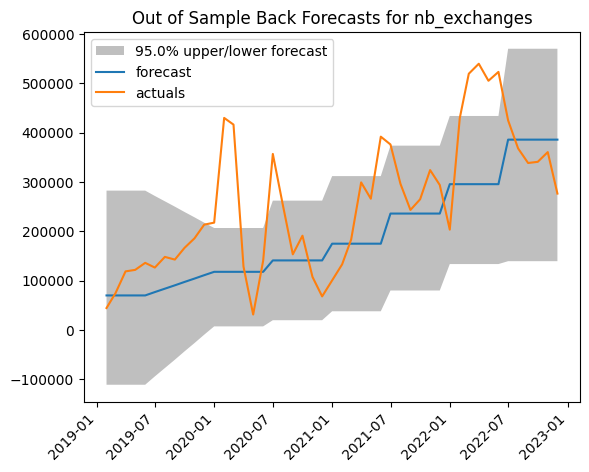

In [ ]:
line_a=model_a.plot_backforecast(n_splits='auto', start_date="2019-01-31")

actual_a_result=line_a.lines[0].get_ydata()


In [ ]:
df_result['arima']=actual_a_result
df_result

,nb_exchanges,arima
created_at,,
2019-01-31,44388.0,69931.300668
2019-02-28,74730.0,69931.300668
2019-03-31,118685.0,69931.300668
2019-04-30,121745.0,69931.300668
2019-05-31,135947.0,69931.300668
2019-06-30,126411.0,76767.191311
2019-07-31,148054.0,83603.081954
2019-08-31,142589.0,90438.972596
2019-09-30,166341.0,97274.863239


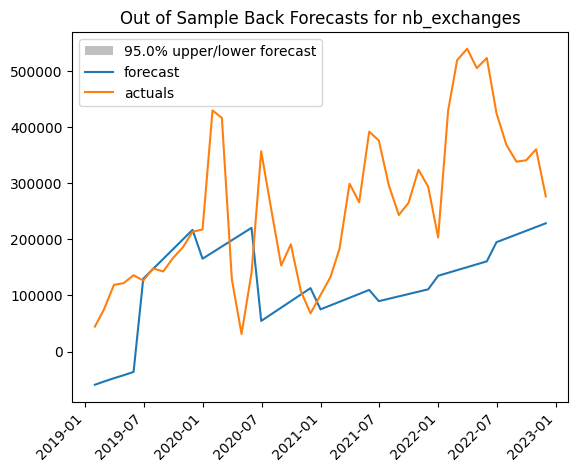

In [ ]:
line_u=model_u.plot_backforecast(n_splits='auto', start_date="2019-01-31")

actual_u_result=line_u.lines[0].get_ydata()


In [ ]:
df_result['univariate']=actual_u_result
df_result

,nb_exchanges,arima,univariate
created_at,,,
2019-01-31,44388.0,69931.300668,-59218.766045
2019-02-28,74730.0,69931.300668,-53514.650976
2019-03-31,118685.0,69931.300668,-47620.398738
2019-04-30,121745.0,69931.300668,-42296.558006
2019-05-31,135947.0,69931.300668,-36402.305768
2019-06-30,126411.0,76767.191311,129725.110027
2019-07-31,148054.0,83603.081954,147361.446100
2019-08-31,142589.0,90438.972596,164997.782172
2019-09-30,166341.0,97274.863239,182065.204178


In [ ]:
prediction_u = model_u.predict(forecast_length=36)
prediction_u_forecast=prediction_u.forecast
prediction_u_forecast.columns=['univariate']
prediction_u_forecast

,univariate
2022-12-31,244484.457243
2023-01-31,251674.398340
2023-02-28,258168.538685
2023-03-31,265358.479782
2023-04-30,272316.487295
2023-05-31,279506.428392
2023-06-30,286464.435904
2023-07-31,293654.377001
2023-08-31,300844.318098
2023-09-30,307802.325611


In [ ]:
prediction_a = model_a.predict(forecast_length=36)
prediction_a_forecast=prediction_a.forecast
prediction_a_forecast.columns=['arima']
prediction_a_forecast

,arima
2022-12-31,407840.023727
2023-01-31,407840.023727
2023-02-28,407840.023727
2023-03-31,407840.023727
2023-04-30,407840.023727
2023-05-31,407840.023727
2023-06-30,407840.023727
2023-07-31,407840.023727
2023-08-31,407840.023727
2023-09-30,407840.023727


In [ ]:
df_result=pd.concat([df_result,prediction_a_forecast])
df_result.reset_index(inplace=True)

In [ ]:
prediction_u_forecast

,univariate
2022-12-31,244484.457243
2023-01-31,251674.398340
2023-02-28,258168.538685
2023-03-31,265358.479782
2023-04-30,272316.487295
2023-05-31,279506.428392
2023-06-30,286464.435904
2023-07-31,293654.377001
2023-08-31,300844.318098
2023-09-30,307802.325611


In [ ]:
df_result.loc[47:,'univariate']=prediction_u_forecast.values


In [ ]:
df_result.columns=['ds','actual','arima','univariate']
df_result

,ds,actual,arima,univariate
0,2019-01-31,44388.0,69931.300668,-59218.766045
1,2019-02-28,74730.0,69931.300668,-53514.650976
2,2019-03-31,118685.0,69931.300668,-47620.398738
3,2019-04-30,121745.0,69931.300668,-42296.558006
4,2019-05-31,135947.0,69931.300668,-36402.305768
...,...,...,...,...
78,2025-07-31,NaN,407840.023727,463197.826732
79,2025-08-31,NaN,407840.023727,470387.767828
80,2025-09-30,NaN,407840.023727,477345.775341
81,2025-10-31,NaN,407840.023727,484535.716438


## Get Prohet result

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM homeex-420408.home_exchange.prophet_prediction"
project = "homeex-420408"

df_prophet = pd.read_gbq(query=query, project_id=project)

df_prophet

,ds,yhat,actual
0,2019-01-31 00:00:00+00:00,144684.011547,44388
1,2019-02-28 00:00:00+00:00,13137.893570,74730
2,2019-03-31 00:00:00+00:00,151965.951629,118685
3,2019-04-30 00:00:00+00:00,177513.932674,121745
4,2019-05-31 00:00:00+00:00,199836.519616,135947
...,...,...,...
78,2025-07-01 00:00:00+00:00,928084.732204,<NA>
79,2025-08-01 00:00:00+00:00,725681.182466,<NA>
80,2025-09-01 00:00:00+00:00,585943.346817,<NA>
81,2025-10-01 00:00:00+00:00,694678.295691,<NA>


In [ ]:
df_result['prophet']=df_prophet['yhat']
df_result

,ds,actual,arima,univariate,prophet
0,2019-01-31,44388.0,69931.300668,-59218.766045,144684.011547
1,2019-02-28,74730.0,69931.300668,-53514.650976,13137.893570
2,2019-03-31,118685.0,69931.300668,-47620.398738,151965.951629
3,2019-04-30,121745.0,69931.300668,-42296.558006,177513.932674
4,2019-05-31,135947.0,69931.300668,-36402.305768,199836.519616
...,...,...,...,...,...
78,2025-07-31,NaN,407840.023727,463197.826732,928084.732204
79,2025-08-31,NaN,407840.023727,470387.767828,725681.182466
80,2025-09-30,NaN,407840.023727,477345.775341,585943.346817
81,2025-10-31,NaN,407840.023727,484535.716438,694678.295691


In [ ]:
df_result.to_gbq('homeex-420408.home_exchange.all_prediction',project_id='homeex-420408',if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 4396.55it/s]


In [ ]:
df_plot=df_result.set_index('ds')
df_plot

,actual,arima,univariate,prophet
ds,,,,
2019-01-31,44388.0,69931.300668,-59218.766045,144684.011547
2019-02-28,74730.0,69931.300668,-53514.650976,13137.893570
2019-03-31,118685.0,69931.300668,-47620.398738,151965.951629
2019-04-30,121745.0,69931.300668,-42296.558006,177513.932674
2019-05-31,135947.0,69931.300668,-36402.305768,199836.519616
...,...,...,...,...
2025-07-31,NaN,407840.023727,463197.826732,928084.732204
2025-08-31,NaN,407840.023727,470387.767828,725681.182466
2025-09-30,NaN,407840.023727,477345.775341,585943.346817


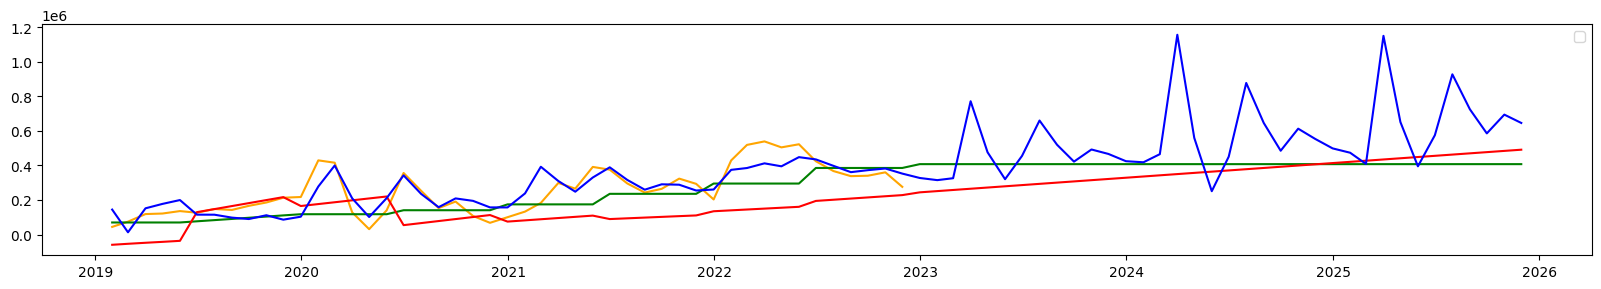

In [ ]:
 %matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(df_plot['actual'], color='orange')
ax.plot(df_plot['arima'], color='g')
ax.plot(df_plot['univariate'],color='r')
ax.plot(df_plot['prophet'],color='b')
ax.legend()

In [ ]:
df_result


,ds,actual,arima,univariate,prophet
0,2019-01-31,44388.0,69931.300668,-59218.766045,144684.011547
1,2019-02-28,74730.0,69931.300668,-53514.650976,13137.893570
2,2019-03-31,118685.0,69931.300668,-47620.398738,151965.951629
3,2019-04-30,121745.0,69931.300668,-42296.558006,177513.932674
4,2019-05-31,135947.0,69931.300668,-36402.305768,199836.519616
...,...,...,...,...,...
78,2025-07-31,NaN,407840.023727,463197.826732,928084.732204
79,2025-08-31,NaN,407840.023727,470387.767828,725681.182466
80,2025-09-30,NaN,407840.023727,477345.775341,585943.346817
81,2025-10-31,NaN,407840.023727,484535.716438,694678.295691


In [ ]:
df.columns[1:]

Index(['cat'], dtype='object')

In [ ]:
 %matplotlib inline
import plotly.express as px


fig1=px.line(df_result, x='ds', y=df_result.columns[2:])
fig2=px.scatter(df_result, x='ds', y=df_result.columns[1]).add_traces(fig1.data)

fig2.show()


In [ ]:
df["cat"] = "Actual"
df_pred = pd.DataFrame(prediction.forecast)
df_pred["cat"] = "Forecasted"

In [ ]:
df_total=pd.concat([df,df_pred])

In [ ]:
df_total.to_csv("forecast.csv")